**LAB-11:**

---



* Created Date: 19.04.2024
* Created By: Blessy Louis(2348416)
* edited on: 19.04.2024

#Importing the necessary packages and libaries


1. **sklearn.metrics.confusion_matrix**: This library provides functionality to compute confusion matrix to evaluate the accuracy of a classification.

2. **sklearn.model_selection.train_test_split**: This library is used to split the dataset into training and testing sets. It's commonly used to assess the performance of a machine learning model.

3. **sklearn.svm**: This is the Support Vector Machines (SVM) implementation in scikit-learn, a popular machine learning library in Python. It provides implementations of SVM algorithms for classification and regression tasks.

4. **sklearn.metrics.f1_score**: This library provides functionality to compute the F1 score, which is the harmonic mean of precision and recall. It's commonly used as a performance metric for classification problems.

5. **matplotlib.pyplot**: Matplotlib is a plotting library for Python. `pyplot` is a subpackage of Matplotlib that provides a MATLAB-like interface for creating plots and visualizations.

6. **numpy**: NumPy is a fundamental package for scientific computing in Python. It provides support for multi-dimensional arrays and matrices, along with a large collection of mathematical functions.

7. **pandas**: Pandas is a powerful library for data manipulation and analysis in Python. It provides data structures and functions to work with structured data efficiently, primarily in the form of DataFrame objects.

8. **seaborn**: Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In summary, these libraries are essential tools for performing machine learning tasks, including data manipulation, model training, evaluation, and visualization. They offer a wide range of functionalities to streamline the machine learning workflow and facilitate the analysis of data and models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The dataset likely contains data about bank customers, including their demographics, financial information, and indicators of their relationship with the bank (e.g., tenure, number of products). The target variable seems to be "Exited," which indicates whether a customer has left the bank. This dataset could be used for various analyses, including customer churn prediction, customer segmentation, and understanding factors influencing customer behavior.

# **Features:**

1. **RowNumber**: This seems to be a unique identifier for each row in the dataset.

2. **CustomerId**: Unique identifier for each customer.

3. **Surname**: Last name of the customer.

4. **CreditScore**: Numerical value representing the credit score of the customer.

5. **Geography**: Categorical variable indicating the country or region where the customer is located.

6. **Gender**: Categorical variable indicating the gender of the customer.

7. **Age**: Numerical value representing the age of the customer.

8. **Tenure**: Numerical value representing the number of years the customer has been with the bank.

9. **Balance**: Numerical value representing the account balance of the customer.

10. **NumOfProducts**: Numerical value representing the number of bank products (e.g., savings account, credit card) held by the customer.

11. **HasCrCard**: Binary variable indicating whether the customer has a credit card (1 for yes, 0 for no).

12. **IsActiveMember**: Binary variable indicating whether the customer is an active member of the bank (1 for yes, 0 for no).

13. **EstimatedSalary**: Numerical value representing the estimated salary of the customer.

14. **Exited**: Binary variable indicating whether the customer has exited the bank (1 for yes, 0 for no).



In [2]:
df=pd.read_csv('Churn_Modelling.csv')

# **EDA**

**Displaying first 5 rows of the dataset**

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.shape

(10000, 14)

clearly the dataset has 10000 rows and 14 columns

**Data Description: Features in the data**

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**Checking for null values**

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Clearly we see that there are no null values in the dataset

**Displaying the information about the data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


This output is a summary generated by pandas for a DataFrame containing 10,000 entries with 14 columns. Here's an explanation of each part:

- **RangeIndex**: The RangeIndex indicates that the DataFrame has a default index starting from 0 and ending at 9999, with a total of 10,000 entries.

- **Data columns**: This section lists the columns of the DataFrame along with some additional information:
  - **Column**: Names of the columns.
  - **Non-Null Count**: Number of non-null values in each column, indicating the completeness of the data. In this case, there are 10,000 non-null values for each column, indicating that there are no missing values.
  - **Dtype**: Data types of the values in each column. The DataFrame contains columns with three different data types:
    - `int64`: Integer values.
    - `float64`: Floating-point (decimal) values.
    - `object`: Text or string values.

- **Memory usage**: This indicates the amount of memory used by the DataFrame to store the data. In this case, it's approximately 1.1 MB.

Here's a breakdown of the columns:
1. `RowNumber`: Unique identifier for each row.
2. `CustomerId`: Unique identifier for each customer.
3. `Surname`: Last name of the customer.
4. `CreditScore`: Numerical value representing the credit score of the customer.
5. `Geography`: Categorical variable indicating the country or region where the customer is located.
6. `Gender`: Categorical variable indicating the gender of the customer.
7. `Age`: Numerical value representing the age of the customer.
8. `Tenure`: Numerical value representing the number of years the customer has been with the bank.
9. `Balance`: Numerical value representing the account balance of the customer.
10. `NumOfProducts`: Numerical value representing the number of bank products (e.g., savings account, credit card) held by the customer.
11. `HasCrCard`: Binary variable indicating whether the customer has a credit card (1 for yes, 0 for no).
12. `IsActiveMember`: Binary variable indicating whether the customer is an active member of the bank (1 for yes, 0 for no).
13. `EstimatedSalary`: Numerical value representing the estimated salary of the customer.
14. `Exited`: Binary variable indicating whether the customer has exited the bank (1 for yes, 0 for no).

### **Univariate Analysis**

Numerical Variables:

In [8]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000


1. **CreditScore**:
The credit scores of customers range from 350 to 850, with a mean score of 650.53 and a standard deviation of 96.65. The distribution of credit scores is relatively normal, with the majority of customers falling within the interquartile range of 584 to 718.

2. **Age**:
Customer ages range from 18 to 92 years, with a mean age of 38.92 and a standard deviation of 10.49. The age distribution is somewhat positively skewed, with the majority of customers falling between the ages of 32 and 44, as indicated by the interquartile range of 32 to 44.

3. **Tenure**:
The tenure of customers with the bank ranges from 0 to 10 years, with a mean tenure of 5.01 years and a standard deviation of 2.89. The distribution of tenure is fairly even, with customers evenly distributed across the range of tenures.

4. **Balance**:
Account balances vary widely among customers, ranging from 0 to 250,898.09 units, with a mean balance of 76,485.89 and a standard deviation of 62,397.41. The distribution of balances is positively skewed, with a significant proportion of customers having low or zero balances.

5. **NumOfProducts**:
The number of bank products held by customers ranges from 1 to 4, with a mean of 1.53 and a standard deviation of 0.58. The majority of customers hold one or two products, as indicated by the interquartile range of 1 to 2.

6. **HasCrCard**:
Approximately 70.55% of customers have a credit card, while the remaining 29.45% do not. This binary variable indicates whether a customer holds a credit card with the bank.

7. **IsActiveMember**:
Around 51.51% of customers are classified as active members, while the remaining 48.49% are inactive. This binary variable reflects whether a customer is actively engaged with the bank's services.

8. **EstimatedSalary**:
The estimated salaries of customers range from 11.58 to 199,992.48 units, with a mean salary of 100,090.24 and a standard deviation of 57,510.49. The distribution of estimated salaries is fairly even, with a significant proportion of customers earning between 51,002.11 and 149,388.25 units.

9. **Exited**:
Approximately 20.37% of customers have exited the bank, while the remaining 79.63% have not. This binary variable indicates whether a customer has terminated their relationship with the bank.

  **Visualize distribution of different numerical data**

In [9]:
Age_freq = df['Age'].value_counts(normalize=True)
print(Age_freq)

Age
37    0.0478
38    0.0477
35    0.0474
36    0.0456
34    0.0447
       ...  
92    0.0002
82    0.0001
88    0.0001
85    0.0001
83    0.0001
Name: proportion, Length: 70, dtype: float64


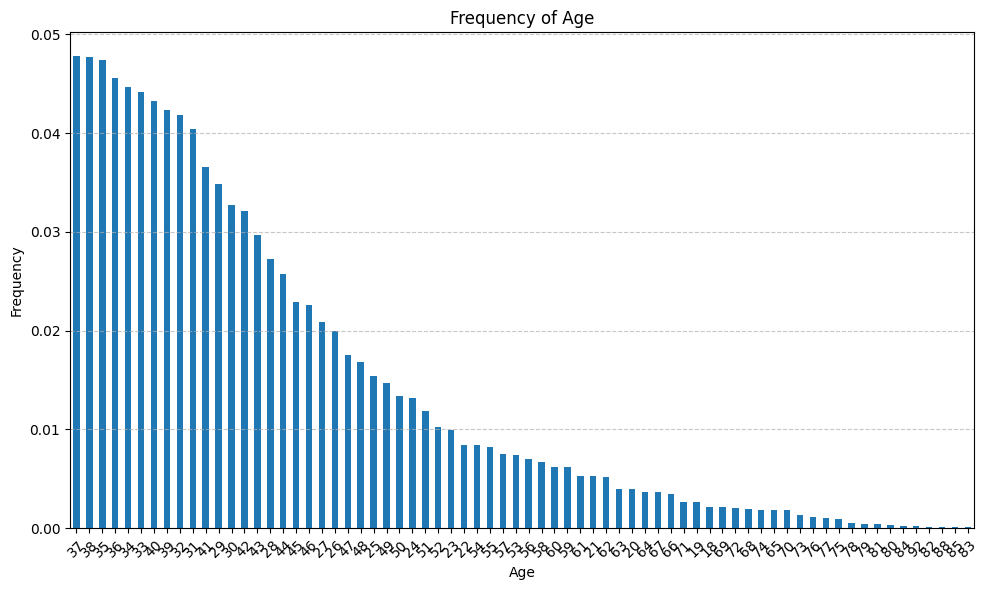

In [10]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
Age_freq.plot(kind='bar')
plt.title('Frequency of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

This graph shows the age distribution in the dataset clearly we see that people with age 37 are more in the dataset with almost 5%  occurence follwed by people with age 38 , but the least occurence would be senior citizens especially with age 80 and above

In [11]:
HasCrCard_freq = df['HasCrCard'].value_counts(normalize=True)
print(HasCrCard_freq)

HasCrCard
1    0.7055
0    0.2945
Name: proportion, dtype: float64


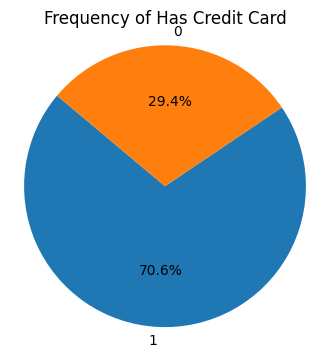

In [14]:
# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(HasCrCard_freq, labels=HasCrCard_freq.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Has Credit Card')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This pie chart shows the distribution of people having a credit card and people with no credit card , clearly there are abput 70.6% of the customers have a credit card , and only 29.4% of them not having a credit card

In [15]:
IsActiveMember_freq = df['IsActiveMember'].value_counts(normalize=True)
print(IsActiveMember_freq)

IsActiveMember
1    0.5151
0    0.4849
Name: proportion, dtype: float64


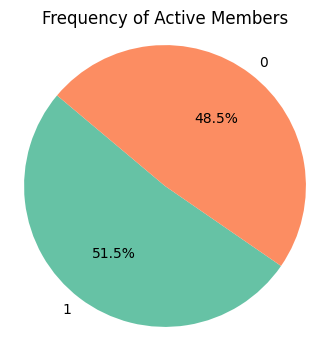

In [19]:
# Define light colors for the pie chart slices
colors = ['#66c2a5', '#fc8d62']  # Light green and light orange

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(IsActiveMember_freq, labels=IsActiveMember_freq.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Frequency of Active Members')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This pie - chart shows the distribution of customers who are active and not active respectively 51.5% of them are active where the resta re inactive

In [20]:
Exited_freq = df['Exited'].value_counts(normalize=True)
print(Exited_freq)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


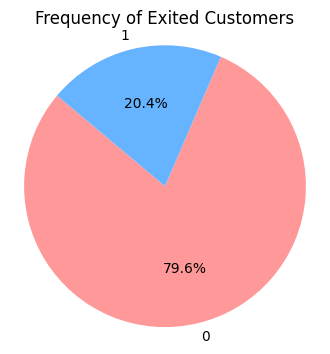

In [23]:
# Define different colors for the pie chart slices
colors = ['#ff9999', '#66b3ff']  # Light red and light blue

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(Exited_freq, labels=Exited_freq.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Frequency of Exited Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

 This pie chart shows how many customers left the bank and how many didn't clearly almost 80% of them did not leave the bank and only 20.4% of them left the bank

In [24]:
gender_freq = df['Gender'].value_counts(normalize=True)
print(gender_freq)

Gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64


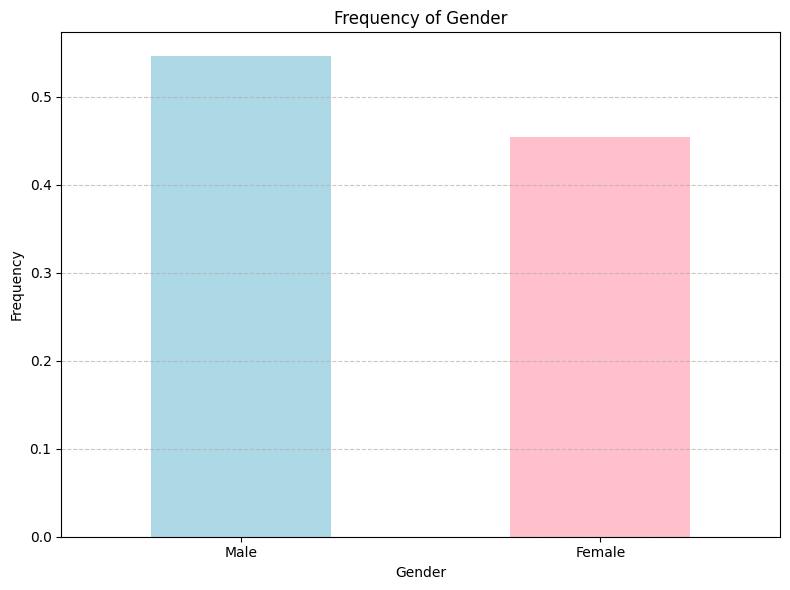

In [26]:
# Define colors for the bar chart
colors = ['#ADD8E6', '#FFC0CB']  # Light blue for male, light pink for female

# Plotting the bar chart
plt.figure(figsize=(8, 6))
gender_freq.plot(kind='bar', color=colors)
plt.title('Frequency of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

This bar chart shows the distribution of gender in the dataset , the dataset have  more male customers with  more than 50% occurence whereas the rest where female customers

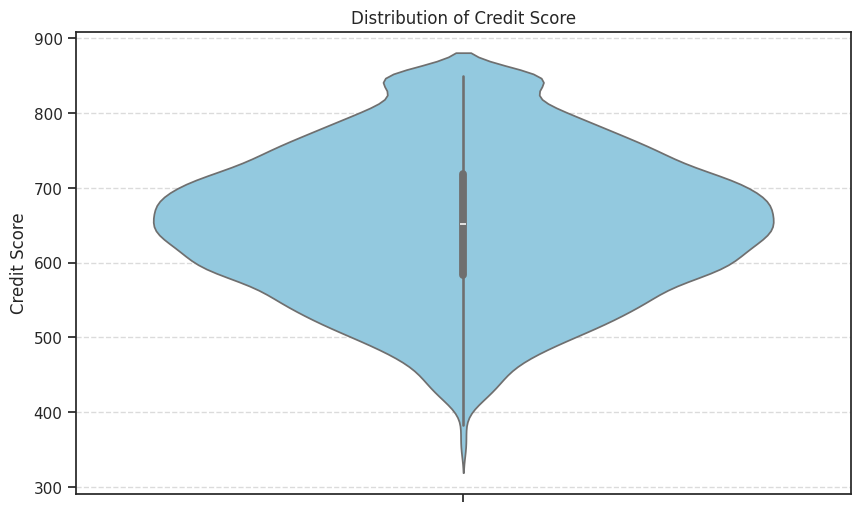

In [70]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y='CreditScore', color='skyblue')
plt.title('Distribution of Credit Score')
plt.ylabel('Credit Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.show()

This Violin plot shows the distribution of credit score of the customers , we see that maximum number of values are clustered between 500-800 , which shows that most of the customers have a credit score in that range , also we see some outliers below 400

### **Bivariate Analysis:**

* Explore relationships between pairs of numerical variables:

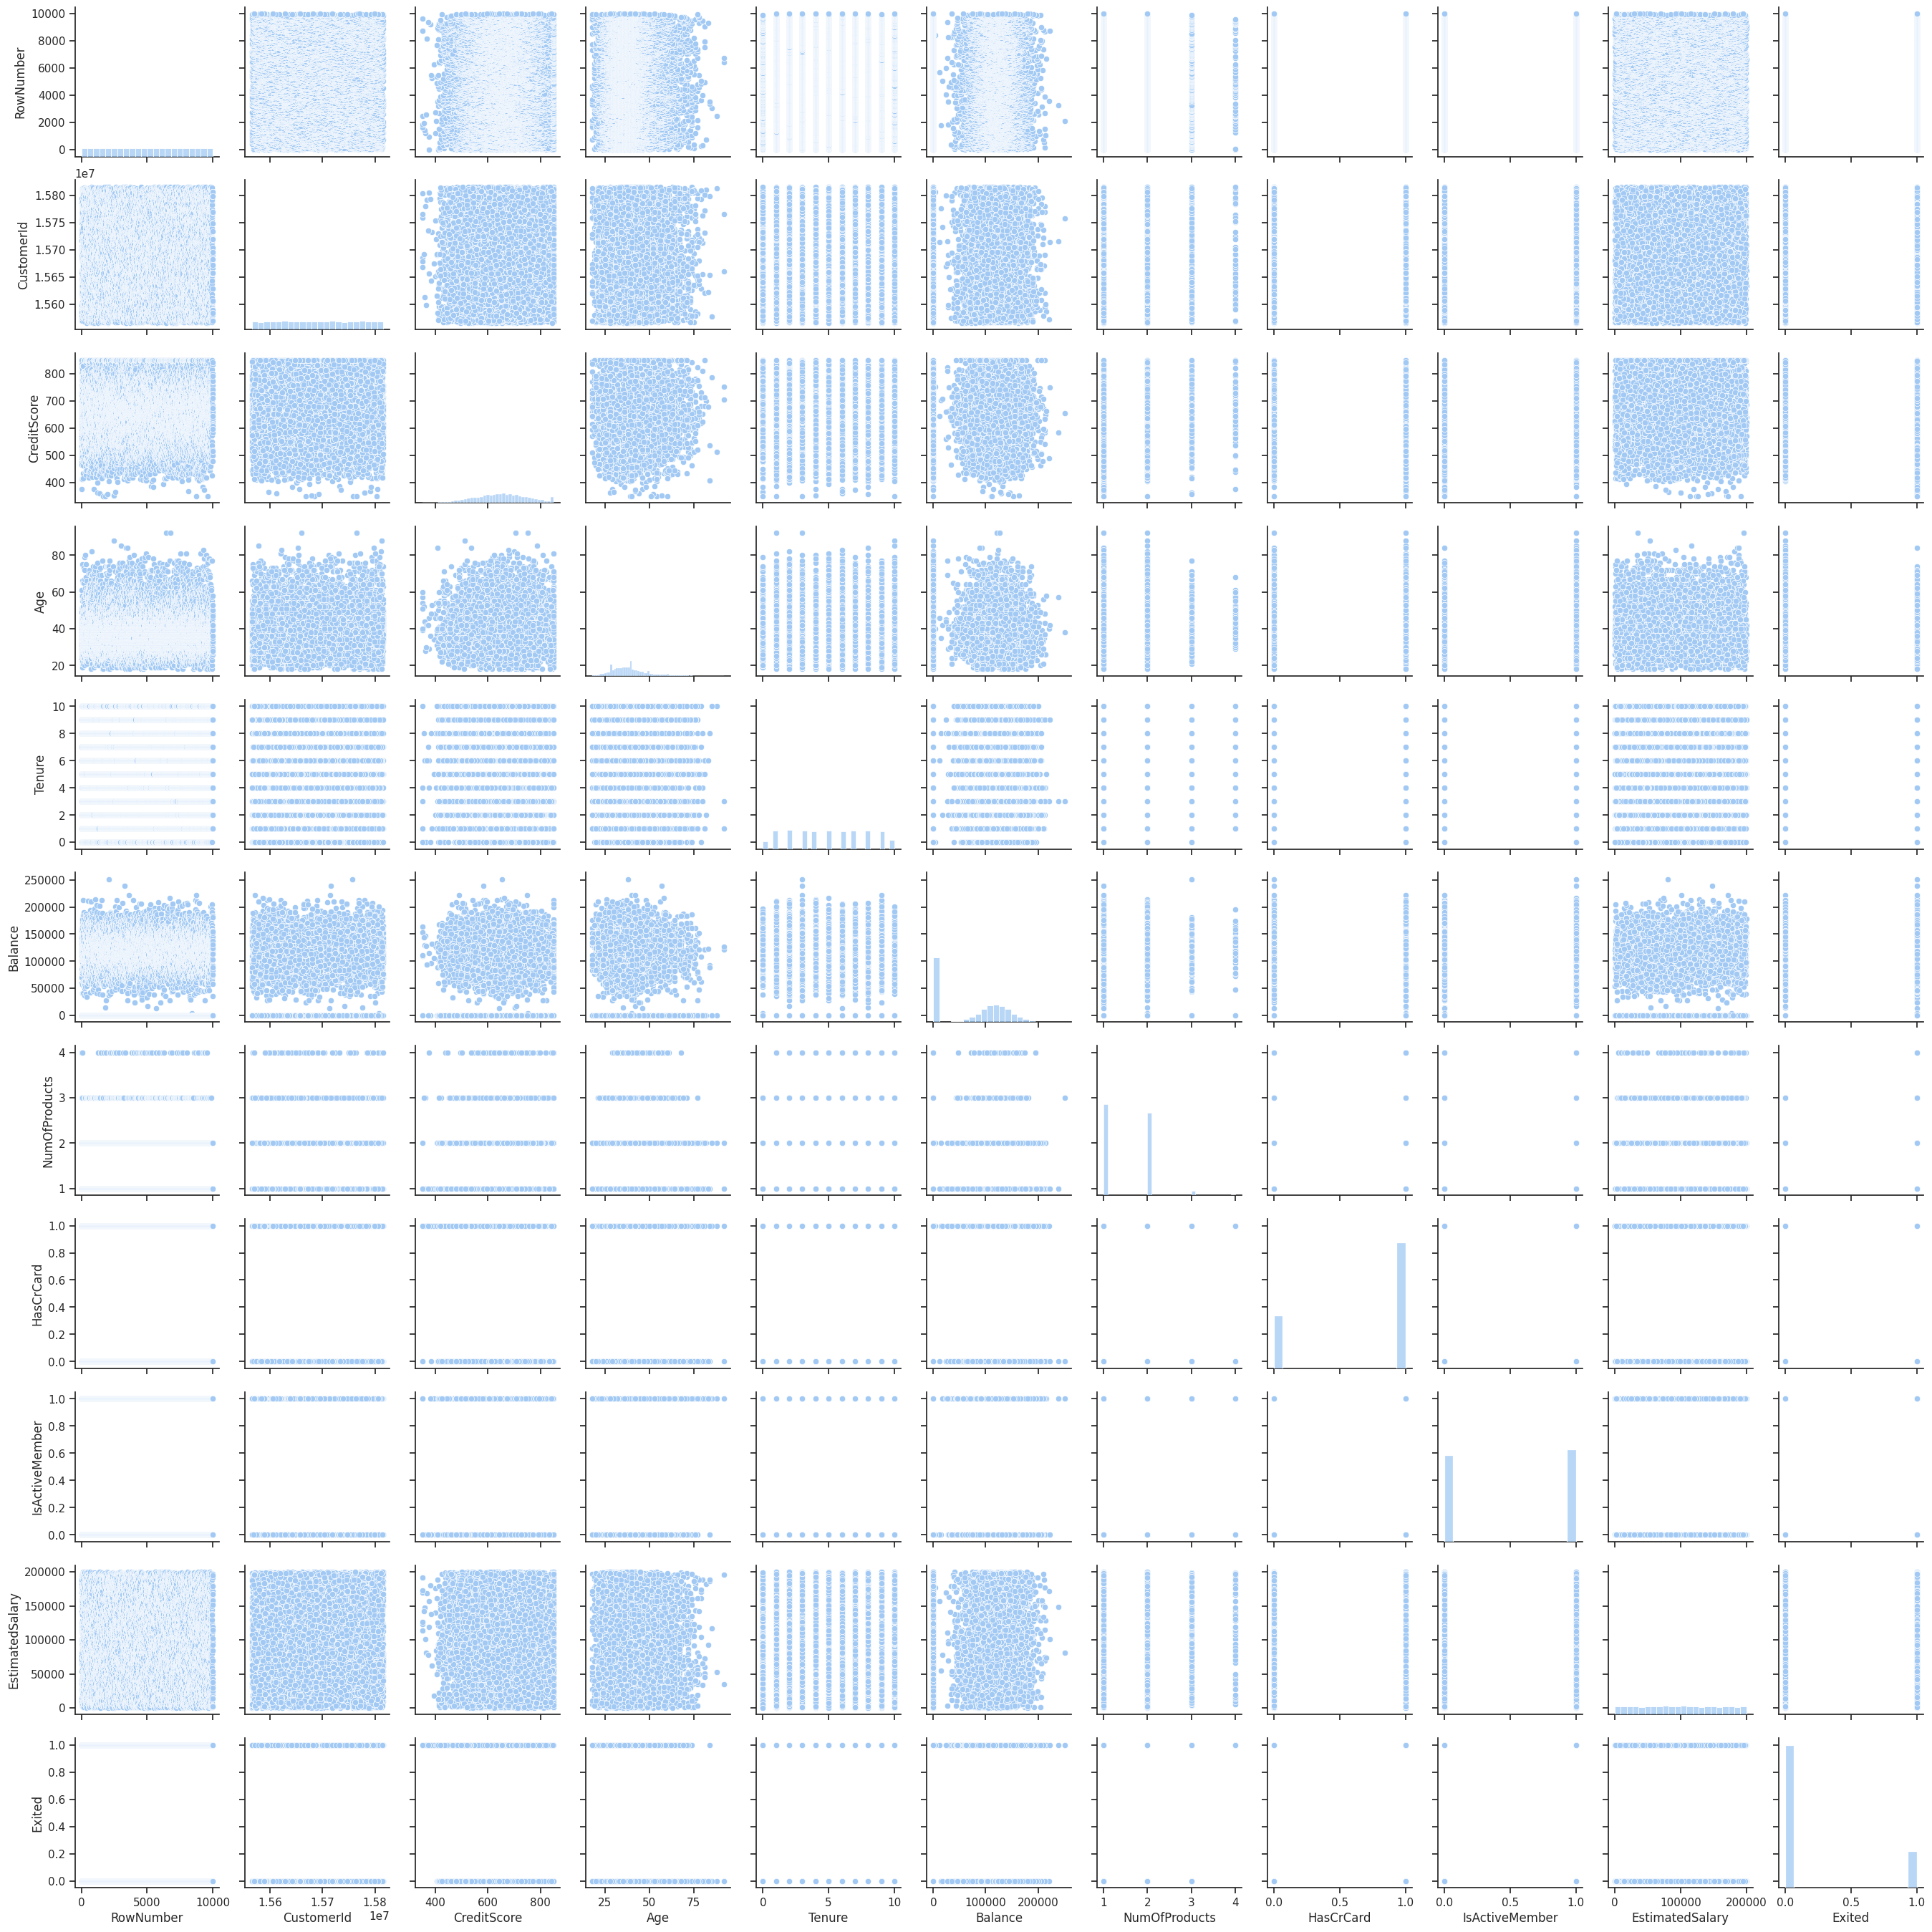

In [31]:
sns.set(style="ticks", palette="pastel")
sns.pairplot(df)
plt.show()

Clearly we see that there exist no linear positive relationship between any of the features

In [35]:
# Drop 'RowNumber' and 'CustomerId' columns
df = df.drop(columns=['RowNumber', 'CustomerId'])

# Selecting only the numerical columns
df_numerical = df.select_dtypes(include=['int64', 'float64'])

# Displaying the numerical features
print(df_numerical)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  
0                  1        101348.88       1  
1                  1        112542.58       0  
2  

In [36]:
# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.28

The correlation matrix provides insights into the linear relationship between pairs of numerical variables in the dataset.
1. **CreditScore and Age**:
   - There is a very weak negative correlation between CreditScore and Age (-0.004). This suggests that there is little to no linear relationship between a customer's credit score and their age.

2. **CreditScore and Tenure**:
   - There is a very weak positive correlation between CreditScore and Tenure (0.001). This indicates that there is almost no linear relationship between a customer's credit score and their tenure with the bank.

3. **CreditScore and Balance**:
   - There is a very weak positive correlation between CreditScore and Balance (0.006). This suggests that there is almost no linear relationship between a customer's credit score and their account balance.

4. **CreditScore and NumOfProducts**:
   - There is a very weak positive correlation between CreditScore and NumOfProducts (0.012). This indicates that there is almost no linear relationship between a customer's credit score and the number of bank products they hold.

5. **CreditScore and HasCrCard**:
   - There is a very weak negative correlation between CreditScore and HasCrCard (-0.005). This suggests that there is little to no linear relationship between a customer's credit score and whether they have a credit card.

6. **CreditScore and IsActiveMember**:
   - There is a very weak positive correlation between CreditScore and IsActiveMember (0.026). This indicates that there is almost no linear relationship between a customer's credit score and their active membership status.

7. **CreditScore and EstimatedSalary**:
   - There is a very weak negative correlation between CreditScore and EstimatedSalary (-0.001). This suggests that there is little to no linear relationship between a customer's credit score and their estimated salary.

8. **CreditScore and Exited**:
   - There is a very weak negative correlation between CreditScore and Exited (-0.027). This indicates that there is almost no linear relationship between a customer's credit score and whether they have exited the bank.

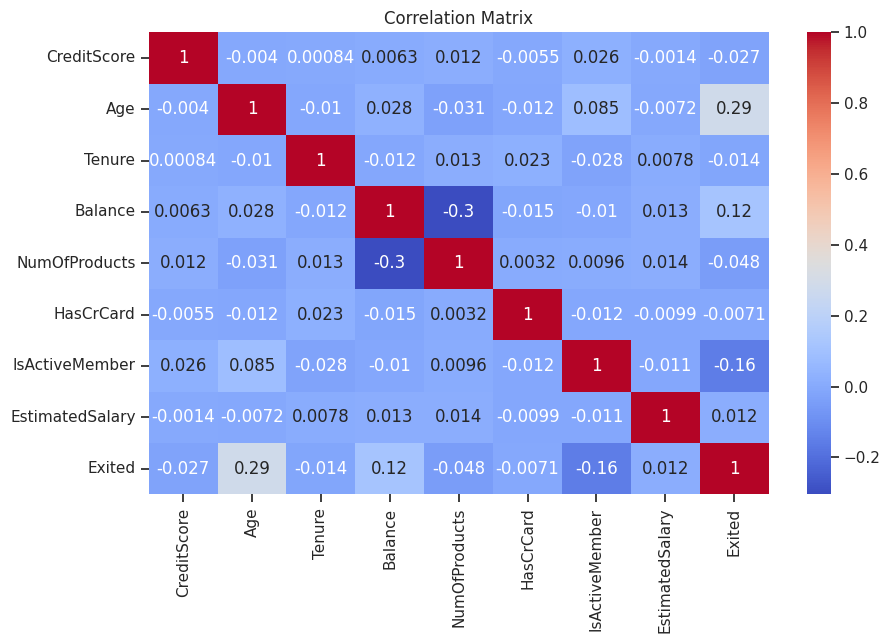

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Overall, the correlation matrix reveals predominantly weak correlations between the numerical variables in the dataset. There are no strong linear relationships observed among the variables. The most notable correlation is a weak positive correlation between a customer's age and the likelihood of them exiting the bank (0.285). However, it's important to note that correlation does not imply causation, so further analysis is required to understand the underlying factors influencing customer churn. Other correlations, such as those between credit score and various other variables, are extremely weak, indicating little to no linear relationship. This suggests that these variables may be independent of each other in the context of the dataset. Additionally, the correlations between variables such as credit score, balance, number of products, and tenure are very weak, indicating that these factors do not have a strong linear impact on each other.

# **Ensemble Learning**

In [46]:
#df = df.drop(columns=['Surname'])
df = df.drop(columns=['Geography'])

In [47]:
#split data into inputs and targets
X = df.drop(columns = ['Exited'])
y = df['Exited']

In [49]:
from sklearn.preprocessing import StandardScaler
# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

# Scale the encoded features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Now X_scaled contains the scaled numerical features
print(X_scaled)

[[-0.32622142  0.29351742 -1.04175968 ...  0.02188649  1.09598752
  -1.09598752]
 [-0.44003595  0.19816383 -1.38753759 ...  0.21653375  1.09598752
  -1.09598752]
 [-1.53679418  0.29351742  1.03290776 ...  0.2406869   1.09598752
  -1.09598752]
 ...
 [ 0.60498839 -0.27860412  0.68712986 ... -1.00864308  1.09598752
  -1.09598752]
 [ 1.25683526  0.29351742 -0.69598177 ... -0.12523071 -0.91241915
   0.91241915]
 [ 1.46377078 -1.04143285 -0.35020386 ... -1.07636976  1.09598752
  -1.09598752]]


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y)

## **Modelling Individual Classifiers**
* KNN
* MLP
* SVM
* LR

**GridSearchCV**

* The model's hyperparameters are tuned using **GridSearchCV**, which performs an exhaustive search over the specified parameter values for the estimator. The best performing model is selected based on cross-validation.

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 26)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])})

In [52]:
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 13}


In [53]:
print('KNN_Best: {}'.format(round(knn_best.score(X_test, y_test)*100,2))+'%')

KNN_Best: 83.73%


In [54]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(activation='relu', solver='lbfgs', learning_rate='constant', alpha=0.0001, hidden_layer_sizes=(5, 2), random_state=1)
mlp_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(5, 2), random_state=1, solver='lbfgs')

In [55]:
from sklearn.metrics import accuracy_score
res = mlp_clf.predict(X_test)
res_acc = accuracy_score(y_test, res)
print ('MLP Accuracy : ',format(res_acc*100,'.2f')+'%')

MLP Accuracy :  85.33%


In [69]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, res)
print(conf_matrix)

[[2308   81]
 [ 359  252]]


In [56]:
from sklearn import svm
SVC_rbf = svm.SVC(kernel='rbf', probability=True).fit(X_train, y_train)
print("Accuracy Radial Basis Kernel:", round(SVC_rbf.score(X_test, y_test)*100,2),"%")

Accuracy Radial Basis Kernel: 85.07 %


In [57]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [58]:
print("Logistic Regfression Accuracy: ",format(log_reg.score(X_test, y_test)*100))


Logistic Regfression Accuracy:  80.73333333333333


In [59]:
#test the three models with the test data and print their accuracy scores
print('kNN: {}'.format(round(knn_best.score(X_test, y_test)*100,2))+'%')
print ('MLP : ',format(res_acc*100,'.2f')+'%')
print('SVM: {}'.format(round(SVC_rbf.score(X_test, y_test)*100,2))+'%')
print('log_reg: {}'.format(round(log_reg.score(X_test, y_test)*100,2))+'%')

kNN: 83.73%
MLP :  85.33%
SVM: 85.07%
log_reg: 80.73%


**Voting Classifier**

In [60]:
from sklearn.ensemble import VotingClassifier
estimators=[('knn', knn_best), ('SVC', SVC_rbf), ('log_reg', log_reg),('MLP',mlp_clf)]
#soft voiting
ensemble = VotingClassifier(estimators, voting='soft', verbose=True)

**Voting Classifier supports two types of votings:**

* **Hard Voting:** In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.

* **Soft Voting:** In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

In [61]:
#Hard / Soft Voting
ensemble.fit_transform(X_train, y_train)
ensemble.transform(X_train)
#print(ensemble.predict(X_train))
score=ensemble.score(X_test, y_test)*100
print("Accuracy :"+format(score,".2f")+"%")

[Voting] ...................... (1 of 4) Processing knn, total=   0.0s
[Voting] ...................... (2 of 4) Processing SVC, total=  10.0s
[Voting] .................. (3 of 4) Processing log_reg, total=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[Voting] ...................... (4 of 4) Processing MLP, total=   2.0s
Accuracy :85.17%


In [62]:
from sklearn.ensemble import VotingClassifier
estimators=[('knn', knn_best), ('SVC', SVC_rbf), ('log_reg', log_reg),('MLP',mlp_clf)]
#hard voiting
ensemble = VotingClassifier(estimators, voting='hard', verbose=True)

In [63]:
#Hard / Soft Voting
ensemble.fit_transform(X_train, y_train)
ensemble.transform(X_train)
#print(ensemble.predict(X_train))
score=ensemble.score(X_test, y_test)*100
print("Accuracy :"+format(score,".2f")+"%")

[Voting] ...................... (1 of 4) Processing knn, total=   0.0s
[Voting] ...................... (2 of 4) Processing SVC, total=   8.1s
[Voting] .................. (3 of 4) Processing log_reg, total=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[Voting] ...................... (4 of 4) Processing MLP, total=   0.8s
Accuracy :84.70%


In comparison between hard vs soft voting , we clearing see that  soft voting resulted in an accuracy of 85.17% and computes with a time of 2.0s whereas considering the hard voting the accuracy resulted in 84.70% but the time is reduced to 0.8s

**Training and Testing Data : Bagging Classifier - Random Forest**

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred)*100:.2f}"+"%")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5574    0]
 [   0 1426]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    5574.0  1426.0       1.0     7000.0        7000.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[2298   91]
 [ 358  253]]
ACCURACY SCORE:
85.03%
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.865211    0.735465  0.850333     0.800338      0.838786
recall        0.961909    0.414075  0.850333     0.687992      0.850333
f1-score      0.911001    0.529843  0.850333     0.720422      0.833372
support    2389.000000  611.000000  0.850333  3000.000000   3000.000000




**Training Results:**
- **Confusion Matrix:** The model correctly predicted all instances of both classes (Exited and Not Exited) in the training data. There were 5574 true negatives and 1426 true positives.
- **Accuracy Score:** The model achieved a perfect accuracy score of 100% on the training data.
- **Classification Report:** Precision, recall, and F1-score are all 1.0 for both classes (Exited and Not Exited). The support represents the number of instances for each class.

**Testing Results:**
- **Confusion Matrix:** In the testing data, the model correctly predicted 2298 instances of the 'Not Exited' class and 253 instances of the 'Exited' class. However, it incorrectly classified 91 instances of 'Not Exited' as 'Exited', and 358 instances of 'Exited' as 'Not Exited'.
- **Accuracy Score:** The model achieved an accuracy score of 85.03% on the testing data, indicating that it correctly classified 85.03% of the instances.
- **Classification Report:** The precision for the 'Not Exited' class is 0.87, indicating that 87% of the instances classified as 'Not Exited' are actually 'Not Exited'. The precision for the 'Exited' class is 0.74, indicating that 74% of the instances classified as 'Exited' are actually 'Exited'. The recall for the 'Not Exited' class is 0.96, indicating that 96% of the actual 'Not Exited' instances were correctly classified. The recall for the 'Exited' class is 0.41, indicating that only 41% of the actual 'Exited' instances were correctly classified. The F1-score provides a balance between precision and recall.
- **Support:** The support represents the number of instances for each class in the testing data.

Overall, the model performed well on the training data, achieving perfect accuracy. However, it showed some limitations when applied to the testing data, with a lower accuracy score and varying precision and recall values for different classes. Further analysis and potentially model refinement may be necessary to improve performance on unseen data.

**Boosting Algorithms**

* Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

* Once created, the models make predictions that may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

* AdaBoost
* Stochastic Gradient Boosting

**AdaBoost**

* AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay less attention to them in the construction of subsequent models.

You can construct an AdaBoost model for classification using the AdaBoostClassifier class.

In [66]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5295  279]
 [ 739  687]]
ACCURACY SCORE:
0.8546
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.877527     0.711180  0.854571     0.794354      0.843640
recall        0.949946     0.481767  0.854571     0.715857      0.854571
f1-score      0.912302     0.574415  0.854571     0.743358      0.843469
support    5574.000000  1426.000000  0.854571  7000.000000   7000.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[2271  118]
 [ 331  280]]
ACCURACY SCORE:
85.03%
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.872790    0.703518  0.850333     0.788154      0.838315
recall        0.950607    0.458265  0.850333     0.704436      0.850333
f1-score      0.910038    0.555005  0.850333     0.732522      0.837730
support    2389.000000  611.000000  0.850333  3000.000000   3000.000000


Here's a summary of the training and testing results:

**Training Results:**
- **Confusion Matrix:** In the training data, the model correctly predicted 5295 instances of the 'Not Exited' class and 687 instances of the 'Exited' class. However, it incorrectly classified 279 instances of 'Not Exited' as 'Exited', and 739 instances of 'Exited' as 'Not Exited'.
- **Accuracy Score:** The model achieved an accuracy score of 85.46% on the training data, indicating that it correctly classified 85.46% of the instances.
- **Classification Report:** The precision for the 'Not Exited' class is 0.88, indicating that 87.75% of the instances classified as 'Not Exited' are actually 'Not Exited'. The precision for the 'Exited' class is 0.71, indicating that 71.12% of the instances classified as 'Exited' are actually 'Exited'. The recall for the 'Not Exited' class is 0.95, indicating that 94.99% of the actual 'Not Exited' instances were correctly classified. The recall for the 'Exited' class is 0.48, indicating that only 48.18% of the actual 'Exited' instances were correctly classified. The F1-score provides a balance between precision and recall.
- **Support:** The support represents the number of instances for each class in the training data.

**Testing Results:**
- **Confusion Matrix:** In the testing data, the model correctly predicted 2271 instances of the 'Not Exited' class and 280 instances of the 'Exited' class. However, it incorrectly classified 118 instances of 'Not Exited' as 'Exited', and 331 instances of 'Exited' as 'Not Exited'.
- **Accuracy Score:** The model achieved an accuracy score of 85.03% on the testing data, indicating that it correctly classified 85.03% of the instances.
- **Classification Report:** The precision for the 'Not Exited' class is 0.87, indicating that 87.28% of the instances classified as 'Not Exited' are actually 'Not Exited'. The precision for the 'Exited' class is 0.70, indicating that 70.35% of the instances classified as 'Exited' are actually 'Exited'. The recall for the 'Not Exited' class is 0.95, indicating that 95.06% of the actual 'Not Exited' instances were correctly classified. The recall for the 'Exited' class is 0.46, indicating that only 45.83% of the actual 'Exited' instances were correctly classified. The F1-score provides a balance between precision and recall.
- **Support:** The support represents the number of instances for each class in the testing data.

Overall, the model performs similarly on both the training and testing data, achieving an accuracy score of around 85%. However, there is room for improvement in correctly identifying instances of the 'Exited' class, as indicated by the lower recall and precision values for this class. Further analysis and potentially model refinement may be necessary to improve performance on identifying churned customers.

**Conclusion**

* Bagging Ensembles including Bagged Decision Trees, Random Forest, and Extra Trees.
* Boosting Ensembles including AdaBoost and Stochastic Gradient Boosting.
* Voting Ensembles for averaging the predictions for any arbitrary models.



Comparing Model-1 and Model-2, both models exhibit strong performance in terms of accuracy on the training data, with Model-1 achieving a perfect accuracy score of 100% and Model-2 achieving a slightly lower accuracy score of 85.46%. However, when evaluated on the testing data, both models demonstrate similar accuracy, achieving around 85.03%. In terms of precision, recall, and F1-score, Model-1 generally outperforms Model-2, particularly in the detection of the 'Exited' class, as indicated by higher precision and recall values. Model-2, while achieving slightly lower precision and recall values, still demonstrates strong performance, particularly in correctly identifying instances of the 'Not Exited' class. Overall, both models show promise in predicting customer churn, with Model-1 exhibiting slightly superior performance on unseen data. However, further evaluation and potentially model refinement may be necessary to improve the robustness and generalization capabilities of both models.